In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
from datetime import datetime, timedelta
#  snp=yf.download('^GSPC', startdate, enddate, auto_adjust=True) s&p 500
# gld=yf.download('GC=F', startdate, enddate, auto_adjust=True) 금
# bit=yf.download('BTC-USD', startdate, enddate, auto_adjust=True) 비트코인
# oil=yf.download('CL=F', startdate, enddate, auto_adjust=True) 유가
# sb=yf.download('^IRX', startdate, enddate, auto_adjust=True) 미국채 1년
# lb=yf.download('^TYX', startdate, enddate, auto_adjust=True) 미국채 30년

startdate='2015-01-01'
enddate=(datetime.now() + timedelta(days=-1)).strftime('%Y-%m-%d')
gld=yf.download('GC=F', startdate, enddate, auto_adjust=True)
snp=yf.download('^GSPC', startdate, enddate, auto_adjust=True)
bit=yf.download('BTC-USD', startdate, enddate, auto_adjust=True)
oil=yf.download('CL=F', startdate, enddate, auto_adjust=True)
sb=yf.download('^IRX', startdate, enddate, auto_adjust=True)
lb=yf.download('^TYX', startdate, enddate, auto_adjust=True)
# 소수점 너무 많아서 3번째까지만
gld = gld.round(3)
snp = snp.round(3)
bit = bit.round(3)
oil = oil.round(3)
sb = sb.round(3)
lb = lb.round(3)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
snp.drop(columns=['Open', 'Volume'], inplace=True)
gld.drop(columns=['Open', 'Volume'], inplace=True)
bit.drop(columns=['Open', 'Volume'], inplace=True)
oil.drop(columns=['Open', 'Volume'], inplace=True)
sb.drop(columns=['Open', 'Volume'], inplace=True)
lb.drop(columns=['Open', 'Volume'], inplace=True)
# gld['type'] = 'gold'
# snp['type'] = 'snp'
# bit['type'] = 'bitcoin'
# oil['type'] = 'oil'
# sb['type'] = 'USBond1year'
# lb['type'] = 'USBond30year'

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

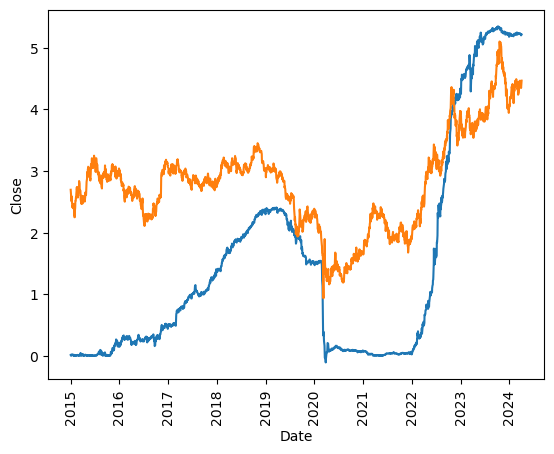

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# line = sns.lineplot(x='Date', y='Close', data=gld)
# line = sns.lineplot(x='Date', y='Close', data=snp)
# line = sns.lineplot(x='Date', y='Close', data=bit)
# line = sns.lineplot(x='Date', y='Close', data=oil)
line = sns.lineplot(x='Date', y='Close', data=sb)
line = sns.lineplot(x='Date', y='Close', data=lb)
line.set_xticklabels(line.get_xticklabels(), rotation=90)
plt.show()

In [5]:
gld['score'] = gld['Close']
snp['score'] = snp['Close'] 
bit['score'] = bit['Close']
oil['score'] = oil['Close']
sb['score'] = sb['Close'] 
lb['score'] = lb['Close']

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
gld[['score']] = scaler.fit_transform(gld[['score']])
snp[['score']] = scaler.fit_transform(snp[['score']])
bit[['score']] = scaler.fit_transform(bit[['score']])
oil[['score']] = scaler.fit_transform(oil[['score']])
sb[['score']] = scaler.fit_transform(sb[['score']])
lb[['score']] = scaler.fit_transform(lb[['score']])

C:\Users\HANSUNG\AppData\Local\Temp\ipykernel_12688\289549483.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  line.set_xticklabels(line.get_xticklabels(), rotation=90)


TypeError: text() missing 1 required positional argument: 's'

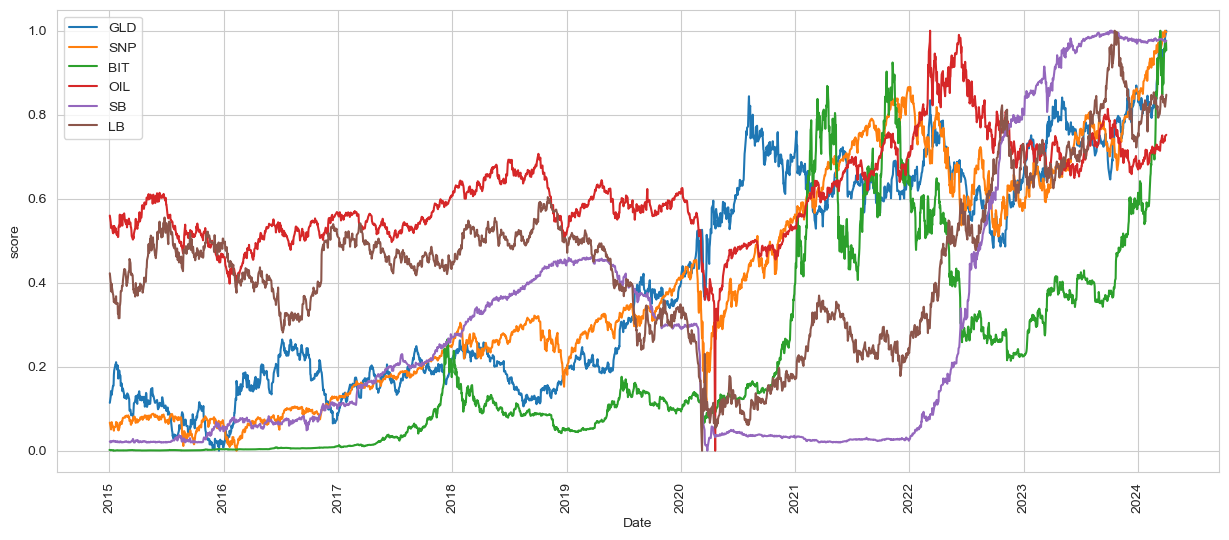

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Assuming gld, snp, bit, oil, sb, lb are your dataframes

plt.figure(figsize=(15, 6))  # Adjust width and height as needed
line = sns.lineplot(x='Date', y='score', data=gld, label='GLD')
line = sns.lineplot(x='Date', y='score', data=snp, label='SNP')
line = sns.lineplot(x='Date', y='score', data=bit, label='BIT')
line = sns.lineplot(x='Date', y='score', data=oil, label='OIL')
line = sns.lineplot(x='Date', y='score', data=sb, label='SB')
line = sns.lineplot(x='Date', y='score', data=lb, label='LB')
line.set_xticklabels(line.get_xticklabels(), rotation=90)

# Add legend
plt.legend()

# Add descriptions
plt.text(0.05, 0.95,  transform=plt.gca().transAxes)
plt.text(0.05, 0.90,  transform=plt.gca().transAxes)
plt.text(0.05, 0.85, transform=plt.gca().transAxes)
plt.text(0.05, 0.80,  transform=plt.gca().transAxes)
plt.text(0.05, 0.75,  transform=plt.gca().transAxes)
plt.text(0.05, 0.70, transform=plt.gca().transAxes)

plt.show()


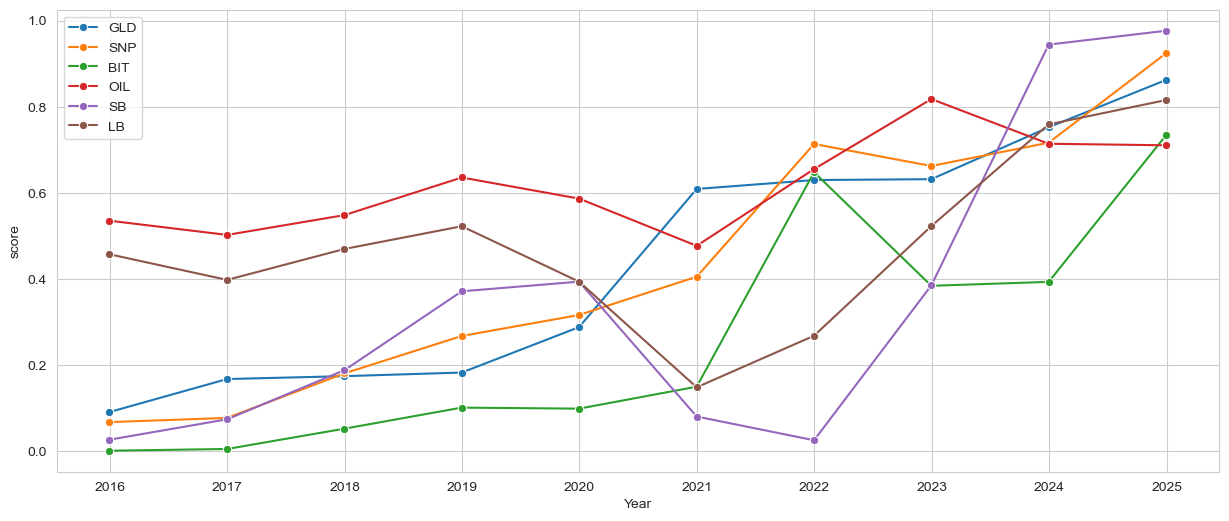

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Resample data by year and calculate the mean
gld_yearly = gld.resample('Y').mean()
snp_yearly = snp.resample('Y').mean()
bit_yearly = bit.resample('Y').mean()
oil_yearly = oil.resample('Y').mean()
sb_yearly = sb.resample('Y').mean()
lb_yearly = lb.resample('Y').mean()

plt.figure(figsize=(15, 6))  # Adjust width and height as needed
line = sns.lineplot(data=gld_yearly['score'], marker='o', label='GLD')
line = sns.lineplot(data=snp_yearly['score'], marker='o', label='SNP')
line = sns.lineplot(data=bit_yearly['score'], marker='o', label='BIT')
line = sns.lineplot(data=oil_yearly['score'], marker='o', label='OIL')
line = sns.lineplot(data=sb_yearly['score'], marker='o', label='SB')
line = sns.lineplot(data=lb_yearly['score'], marker='o', label='LB')

# Set x-axis label
plt.xlabel('Year')

# Set legend
plt.legend()

plt.show()


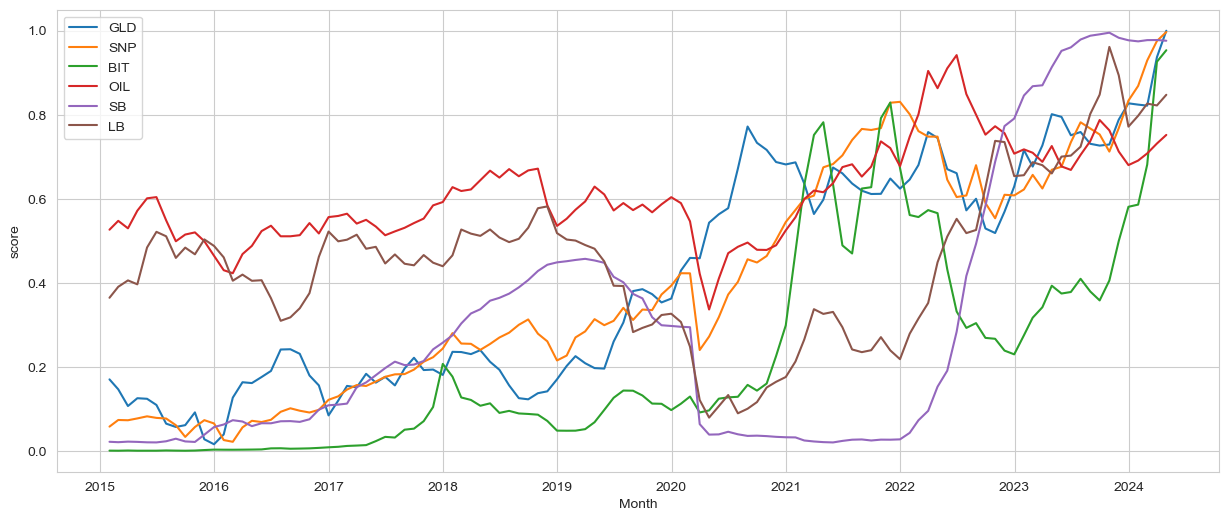

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set_style("whitegrid")

# Resample data by month and calculate the mean
gld_monthly = gld.resample('M').mean()
snp_monthly = snp.resample('M').mean()
bit_monthly = bit.resample('M').mean()
oil_monthly = oil.resample('M').mean()
sb_monthly = sb.resample('M').mean()
lb_monthly = lb.resample('M').mean()

plt.figure(figsize=(15, 6))  # Adjust width and height as needed
line = sns.lineplot(data=gld_monthly['score'],  label='GLD')
line = sns.lineplot(data=snp_monthly['score'],  label='SNP')
line = sns.lineplot(data=bit_monthly['score'],  label='BIT')
line = sns.lineplot(data=oil_monthly['score'], label='OIL')
line = sns.lineplot(data=sb_monthly['score'], label='SB')
line = sns.lineplot(data=lb_monthly['score'], label='LB')

# Set x-axis label
plt.xlabel('Month')

# Set legend
plt.legend()

plt.show()
